In [1]:
import pandas as pd
df = pd.read_csv('Data/Clean_Wine_Data.csv')
df.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4   Spain  Deep, dense and pure from the opening bell, th...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                             Numanthia      95   73.0  Northern Spain   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro               Toro       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4               Toro               Toro       Tinta de Toro   

                    winery   Red?  wineType_encoded               Wine_Bins  
0                    Heitz   True                 1  Connoisseur: Over $100  
1  Bodega Carmen Rodríguez   True                 1  Connoisseur: Over $100  
2                 Macauley  False                 0     Enthusiast: $50-100  
3                    Ponzi   True                 1     Enthusiast: $50-100  
4                Numanthia   True                 1     Enthusiast: $50-100

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

fig = px.histogram(df, x="points")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Point')
fig.show()

In [3]:
df.count()
df[df['points'] <= 90].count()
df[df['points'] > 90].count()

Unnamed: 0          27673
country             27673
description         27673
designation         27673
points              27673
price               27673
province            27673
region_1            27673
region_2            27673
variety             27673
winery              27673
Red?                27673
wineType_encoded    27673
Wine_Bins           27673
dtype: int64

In [4]:
import numpy as np

df['Top_Notch_Wine'] = np.where(df['points'] >= 90, 1, 0)

In [5]:
df.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4   Spain  Deep, dense and pure from the opening bell, th...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                             Numanthia      95   73.0  Northern Spain   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro               Toro       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4               Toro               Toro       Tinta de Toro   

                    winery   Red?  wineType_encoded               Wine_Bins  \
0                    Heitz   True                 1  Connoisseur: Over $100   
1  Bodega Carmen Rodríguez   True                 1  Connoisseur: Over $100   
2                 Macauley  False                 0     Enthusiast: $50-100   
3                    Ponzi   True                 1     Enthusiast: $50-100   
4                Numanthia   True                 1     Enthusiast: $50-100   

   Top_Notch_Wine  
0               1  
1               1  
2               1  
3               1  
4               1

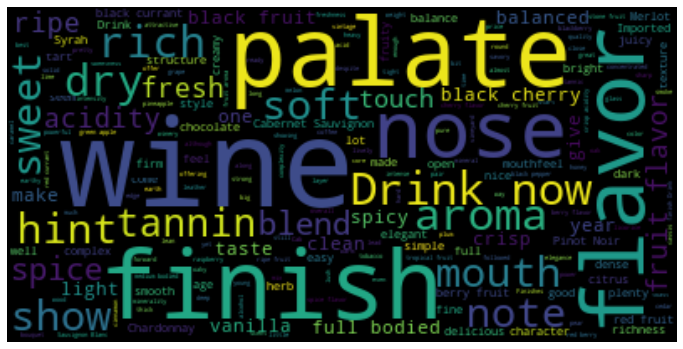

In [6]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Create stopword list:
stop_words = set(STOPWORDS)
stop_words.update(["br", "href"])
textt = " ".join(review for review in df.description)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

## Wordcloud - 'Excellent' Sentiment

In [7]:
excellent = df[df['Top_Notch_Wine'] == 1]
good = df[df['Top_Notch_Wine'] == 0]

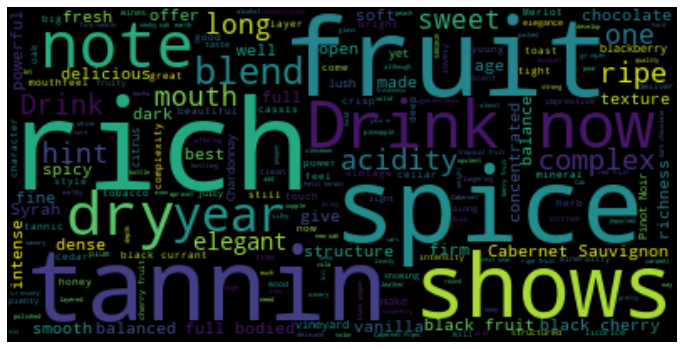

In [8]:
stop_words = set(STOPWORDS)
stop_words.update(["br", "href", "wine", "flavor", "flavors", "finish", "palate", "nose", "show", "aroma", "aromas"]) 

pos = " ".join(review for review in excellent.description)
wordcloud2 = WordCloud(stopwords=stop_words).generate(pos)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud - 'Good' Sentiment

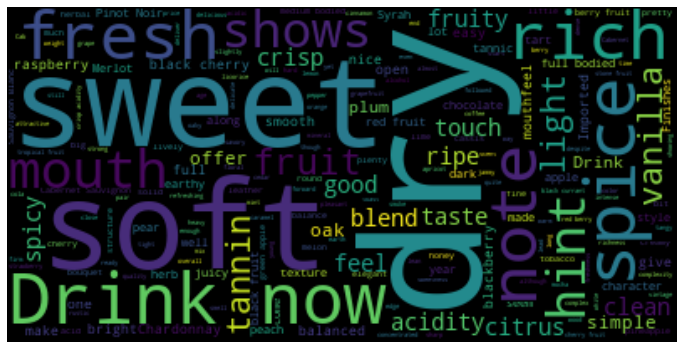

In [9]:
neg = " ".join(review for review in good.description)
wordcloud3 = WordCloud(stopwords=stop_words).generate(neg)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

## Distribution of reviews with sentiment accross dataset

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df

Unnamed: 0 country                                        description  \
0                0      US  This tremendous 100 varietal wine hails from O...   
1                1   Spain  Ripe aromas of fig blackberry and cassis are s...   
2                2      US  Mac Watson honors the memory of a wine once ma...   
3                3      US  This spent 20 months in 30 new French oak and ...   
4                4   Spain  Deep dense and pure from the opening bell this...   
...            ...     ...                                                ...   
134284      134284   Italy  Many people feel Fiano represents southern Ita...   
134285      134285  France  Offers an intriguing nose with ginger lime and...   
134286      134286   Italy  This classic example comes from a cru vineyard...   
134287      134287  France  A perfect salmon shade with scents of peaches ...   
134288      134288   Italy  More Pinot Grigios should taste like this A ri...   

                                 designation  points  price  \
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                  Numanthia      95   73.0   
...                                      ...     ...    ...   
134284                        *Unknown Wine*      91   20.0   
134285                        Cuvée Prestige      91   27.0   
134286                         Terre di Dora      91   20.0   
134287                       Grand Brut Rosé      90   52.0   
134288                        *Unknown Wine*      90   15.0   

                  province           region_1           region_2  \
0               California        Napa Valley               Napa   
1           Northern Spain               Toro               Toro   
2               California     Knights Valley             Sonoma   
3                   Oregon  Willamette Valley  Willamette Valley   
4           Northern Spain               Toro               Toro   
...                    ...                ...                ...   
134284      Southern Italy  Fiano di Avellino  Fiano di Avellino   
134285           Champagne          Champagne          Champagne   
134286      Southern Italy  Fiano di Avellino  Fiano di Avellino   
134287           Champagne          Champagne          Champagne   
134288  Northeastern Italy         Alto Adige         Alto Adige   

                   variety                   winery   Red?  wineType_encoded  \
0       Cabernet Sauvignon                    Heitz   True                 1   
1            Tinta de Toro  Bodega Carmen Rodríguez   True                 1   
2          Sauvignon Blanc                 Macauley  False                 0   
3               Pinot Noir                    Ponzi   True                 1   
4            Tinta de Toro                Numanthia   True                 1   
...                    ...                      ...    ...               ...   
134284         White Blend    Feudi di San Gregorio  False                 0   
134285     Champagne Blend                H.Germain  False                 0   
134286         White Blend                Terredora  False                 0   
134287     Champagne Blend                   Gosset  False                 0   
134288        Pinot Grigio            Alois Lageder  False                 0   

                     Wine_Bins  Top_Notch_Wine Sentiment  random_number  
0       Connoisseur: Over $100               1         1      -0.333795  
1       Connoisseur: Over $100               1         1      -2.436308  
2          Enthusiast: $50-100               1         1       1.312178  
3          Enthusiast: $50-100               1         1      -0.823873  
4          Enthusiast: $50-100               1         1       1.561424  
...                        ...             ...       ...

In [47]:
df['Sentiment'] = df['Sentiment'].replace({1 : 'Excellent'})
df['Sentiment'] = df['Sentiment'].replace({0 : 'Good'})
fig = px.histogram(df, x="Sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [48]:
df

Unnamed: 0 country                                        description  \
0                0      US  This tremendous 100 varietal wine hails from O...   
1                1   Spain  Ripe aromas of fig blackberry and cassis are s...   
2                2      US  Mac Watson honors the memory of a wine once ma...   
3                3      US  This spent 20 months in 30 new French oak and ...   
4                4   Spain  Deep dense and pure from the opening bell this...   
...            ...     ...                                                ...   
134284      134284   Italy  Many people feel Fiano represents southern Ita...   
134285      134285  France  Offers an intriguing nose with ginger lime and...   
134286      134286   Italy  This classic example comes from a cru vineyard...   
134287      134287  France  A perfect salmon shade with scents of peaches ...   
134288      134288   Italy  More Pinot Grigios should taste like this A ri...   

                                 designation  points  price  \
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                  Numanthia      95   73.0   
...                                      ...     ...    ...   
134284                        *Unknown Wine*      91   20.0   
134285                        Cuvée Prestige      91   27.0   
134286                         Terre di Dora      91   20.0   
134287                       Grand Brut Rosé      90   52.0   
134288                        *Unknown Wine*      90   15.0   

                  province           region_1           region_2  \
0               California        Napa Valley               Napa   
1           Northern Spain               Toro               Toro   
2               California     Knights Valley             Sonoma   
3                   Oregon  Willamette Valley  Willamette Valley   
4           Northern Spain               Toro               Toro   
...                    ...                ...                ...   
134284      Southern Italy  Fiano di Avellino  Fiano di Avellino   
134285           Champagne          Champagne          Champagne   
134286      Southern Italy  Fiano di Avellino  Fiano di Avellino   
134287           Champagne          Champagne          Champagne   
134288  Northeastern Italy         Alto Adige         Alto Adige   

                   variety                   winery   Red?  wineType_encoded  \
0       Cabernet Sauvignon                    Heitz   True                 1   
1            Tinta de Toro  Bodega Carmen Rodríguez   True                 1   
2          Sauvignon Blanc                 Macauley  False                 0   
3               Pinot Noir                    Ponzi   True                 1   
4            Tinta de Toro                Numanthia   True                 1   
...                    ...                      ...    ...               ...   
134284         White Blend    Feudi di San Gregorio  False                 0   
134285     Champagne Blend                H.Germain  False                 0   
134286         White Blend                Terredora  False                 0   
134287     Champagne Blend                   Gosset  False                 0   
134288        Pinot Grigio            Alois Lageder  False                 0   

                     Wine_Bins  Top_Notch_Wine  Sentiment  random_number  
0       Connoisseur: Over $100               1  Excellent      -0.333795  
1       Connoisseur: Over $100               1  Excellent      -2.436308  
2          Enthusiast: $50-100               1  Excellent       1.312178  
3          Enthusiast: $50-100               1  Excellent      -0.823873  
4          Enthusiast: $50-100               1  Excellent       1.561424  
...                        ...             ...    

In [13]:
def calculate_index(model,vect):
    top_index = []
    good_index = []
    all_text = ""
    
    file = open('wine_reviews.txt')
    lines = file.readlines()
    
    top_notch_wine = 0
    good_wine = 0
    
    for line in lines:
        point = model.predict(vect.transform([line]))
        
        if point == 1:
            top_notch_wine += 1
        else:
            good_wine += 1
        all_text += ' ' + line.lower()
        
    n = len(lines)
    top_index.append(top_notch_wine / n)
    good_index.append(good_wine / n)
    
    return top_index, good_index

In [14]:
df.tail()

Unnamed: 0 country                                        description  \
134284      134284   Italy  Many people feel Fiano represents southern Ita...   
134285      134285  France  Offers an intriguing nose with ginger, lime an...   
134286      134286   Italy  This classic example comes from a cru vineyard...   
134287      134287  France  A perfect salmon shade, with scents of peaches...   
134288      134288   Italy  More Pinot Grigios should taste like this. A r...   

            designation  points  price            province           region_1  \
134284   *Unknown Wine*      91   20.0      Southern Italy  Fiano di Avellino   
134285   Cuvée Prestige      91   27.0           Champagne          Champagne   
134286    Terre di Dora      91   20.0      Southern Italy  Fiano di Avellino   
134287  Grand Brut Rosé      90   52.0           Champagne          Champagne   
134288   *Unknown Wine*      90   15.0  Northeastern Italy         Alto Adige   

                 region_2          variety                 winery   Red?  \
134284  Fiano di Avellino      White Blend  Feudi di San Gregorio  False   
134285          Champagne  Champagne Blend              H.Germain  False   
134286  Fiano di Avellino      White Blend              Terredora  False   
134287          Champagne  Champagne Blend                 Gosset  False   
134288         Alto Adige     Pinot Grigio          Alois Lageder  False   

        wineType_encoded               Wine_Bins  Top_Notch_Wine Sentiment  
134284                 0  Entry-Level: Under $25               1         1  
134285                 0          Casual: $25-50               1         1  
134286                 0  Entry-Level: Under $25               1         1  
134287                 0     Enthusiast: $50-100               1         1  
134288                 0  Entry-Level: Under $25               1         1

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['description'], 
                            df['Top_Notch_Wine'], random_state=42)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)

In [17]:
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

In [18]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train_vectorized, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [19]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8599340872920863


In [20]:
top_index, good_index = calculate_index(model, vect)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[21388  1640]
 [ 2203  8342]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     23028
           1       0.84      0.79      0.81     10545

    accuracy                           0.89     33573
   macro avg       0.87      0.86      0.87     33573
weighted avg       0.88      0.89      0.88     33573

0.8855330176034313


We can see that our algorithm achieved an accuracy of 88.5

# Logitstic Regression

In [29]:
df["description"] = df['description'].str.replace('[^\w\s]','')

In [32]:
dfNew = df[['description', 'Top_Notch_Wine']]
dfNew.head()

description  Top_Notch_Wine
0  This tremendous 100 varietal wine hails from O...               1
1  Ripe aromas of fig blackberry and cassis are s...               1
2  Mac Watson honors the memory of a wine once ma...               1
3  This spent 20 months in 30 new French oak and ...               1
4  Deep dense and pure from the opening bell this...               1

In [33]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))

In [34]:
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

# Create a bag of words

In [36]:
#  count vectorizer 
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['description'])
test_matrix = vectorizer.transform(test['description'])

In [37]:
#  split target and independent variables
X_train = train_matrix 
X_test = test_matrix
y_train = train['Top_Notch_Wine']
y_test = test['Top_Notch_Wine']

In [38]:
# fit the model
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# make prediction
predictions = lr.predict(X_test)

In [63]:
# testing the model
new = np.asarray(y_test)
cm = confusion_matrix(predictions,y_test)
print(confusion_matrix(predictions,y_test))
print(classification_report(predictions, y_test))
print(accuracy_score(y_test, predictions))

[[18267  1900]
 [ 1300  6948]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     20167
           1       0.79      0.84      0.81      8248

    accuracy                           0.89     28415
   macro avg       0.86      0.87      0.87     28415
weighted avg       0.89      0.89      0.89     28415

0.8873834242477565


In [55]:
import yellowbrick.classifier as ybc

In [58]:
# fig, axes = plt.subplots(2, 2, figsize=(15,12))
# ybc.ConfusionMatrix(lr, classes = df['points'], ax=axes[0][1]),

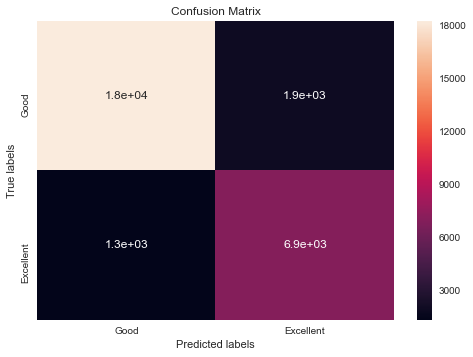

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Good', 'Excellent']); ax.yaxis.set_ticklabels(['Good', 'Excellent']);

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyser

/usr/local/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


ImportError: cannot import name 'SentimentIntensityAnalyser' from 'nltk.sentiment.vader' (/usr/local/anaconda3/lib/python3.7/site-packages/nltk/sentiment/vader.py)